### Clustering
The most prominent clustering algorhithm is K-Means. The goal of this notebook is to implement the K-Means algorithm using Python. Furthermore we also test your implementation on a small data set.

In [1]:
# imports
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

%matplotlib inline

First of all, we create a data set with 3 different clusters and 300 samples

In [2]:
n_samples = 300
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here

# Generate 3 blobs
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
print(X)

[[-4.50328585 -5.1382643 ]
 [-4.35231146 -3.47697014]
 [-5.23415337 -5.23413696]
 [-3.42078718 -4.23256527]
 [-5.46947439 -4.45743996]
 [-5.46341769 -5.46572975]
 [-4.75803773 -6.91328024]
 [-6.72491783 -5.56228753]
 [-6.01283112 -4.68575267]
 [-5.90802408 -6.4123037 ]
 [-3.53435123 -5.2257763 ]
 [-4.9324718  -6.42474819]
 [-5.54438272 -4.88907741]
 [-6.15099358 -4.62430198]
 [-5.60063869 -5.29169375]
 [-5.60170661 -3.14772182]
 [-5.01349722 -6.05771093]
 [-4.17745509 -6.22084365]
 [-4.7911364  -6.95967012]
 [-6.32818605 -4.80313876]
 [-4.26153342 -4.82863172]
 [-5.11564828 -5.3011037 ]
 [-6.47852199 -5.71984421]
 [-5.46063877 -3.94287777]
 [-4.65638171 -6.76304016]
 [-4.67591603 -5.38508228]
 [-5.676922   -4.38832371]
 [-3.96900048 -4.06871988]
 [-5.83921752 -5.30921238]
 [-4.66873657 -4.02445487]
 [-5.47917424 -5.18565898]
 [-6.10633497 -6.19620662]
 [-4.18747418 -3.64375997]
 [-5.07201012 -3.9964671 ]
 [-4.63836397 -5.64511975]
 [-4.63860439 -3.46196343]
 [-5.03582604 -3.43535634]
 

<b>Part 1</b>:

Create an image showing the 3 different clusters. (Making sure to use colors to indidcate the class each sample belongs to)

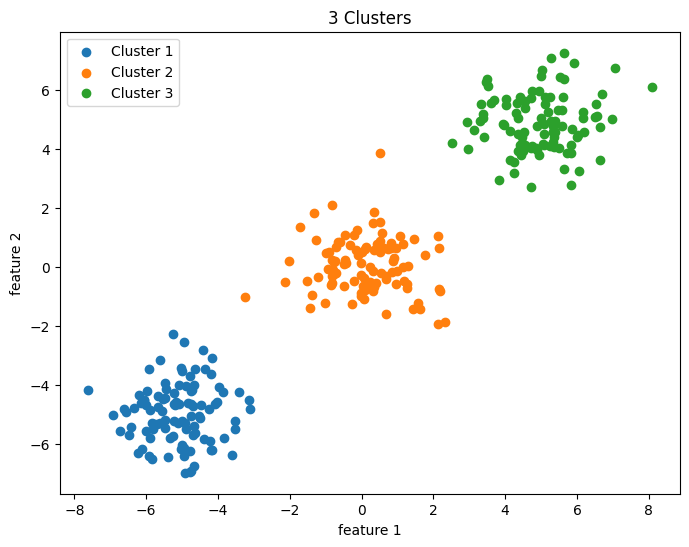

In [3]:
plt.figure(figsize=(8,6))
for cluster in np.unique(y):
    plt.scatter(X[y==cluster][:,0],X[y==cluster][:,1],label=f"Cluster {cluster +1}")
plt.title("3 Clusters")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

Now we want to implement the K-Means algorithm. To do so we have to implement 3 functions: findMapping, findMeans, and kmeans.

<b>Part 2:</b>

Create the function findMapping(X,Means) that calculates for the given cluster means $Means$ a mapping
$R$ of the data points in $X$ to the clusters (Expectation step of K-Means). Here $X \in \mathbb{R}^{n \times m}$ denotes a n by m matrix with n
instances and m numerical features. $Means \in \mathbb{R}^{k \times m}$ denotes a k by m matrix with k m-dimensional cluster centers. The function findMapping should return a matrix $R \in \mathbb{R}^{n \times k}$ defined as follows:
$$R_{i,j} = \begin{cases} 1, & \mbox{if instance } n\mbox{ belongs to cluster } j\\ 0, & \mbox{otherwise}. \end{cases}$$

In [4]:
def findMapping(X,Means):
    n,m = X.shape
    k = Means.shape[0]
    R = np.zeros([n,k])

    for i in range(n):
        #calculate distance to all cluster centres
        distances=np.linalg.norm(X[i]- Means ,axis=1)
        #print("distances", distances)

        #find index of nearest cluster
        nearest_cluster=np.argmin(distances)
        #print(nearest_cluster)

        R[i, nearest_cluster]=1

    return R

<b>Part 3:</b>
    
Create the function findMeans(X,R) that calculates new cluster centers $Means \in \mathbb{R}^{k \times m}$ for the data points in $X$ and the cluster assignments in $R$. Here, $X$ and $R$ are defined as shown in exercise 2.

In [5]:
def findMeans(X,R):
    n,m = X.shape #number of instances and features
    k = R.shape[1] # number of clusters
    Means = np.zeros([k,m])


    #calculate the mean for each cluster 
    for i in range(k):
        #finding the data points assigned to each cluster
        assigned_points=X[R[:,i]==1]

        if len(assigned_points)>1:
            Means[i]=np.mean(assigned_points,axis=0)
    

    return Means

<b>Part 4:</b>

Write the function kmeans(X,k) that returns k means and the assignment of the data points to k clusters using the K-Means algorithm. The matrix $X$ is defined as shown in exercise 2 and $k$ is the number of clusters. The function should return a vector $y \in \mathbb{R}^{n}$. This vector contains for every data point in $X$ the cluster-number $\in 0 \dots (k-1)$. Furthermore the matrix $Means$ containing the cluster centers should also be returned.

In [13]:
def kmeans(X,k,verbose=0):
    n,m = X.shape
    y = np.zeros([n,])
    #initialize cluster centers with random values 
    Means=X[np.random.choice(n,k,replace=False)]

    for iteration in range(100):
        if verbose:
            print(f"iteration {iteration + 1}")
        
        R=findMapping(X,Means)

        new_means=findMeans(X,R)

        if np.allclose(Means,new_means):
            break

        Means=new_means
    
    y=np.argmax(R,axis=1)

    return (y,Means)

<b>Part 5:</b>
Cluster the data $X$ using your clustering algorihm and show the results in a figure including the cluster centers.

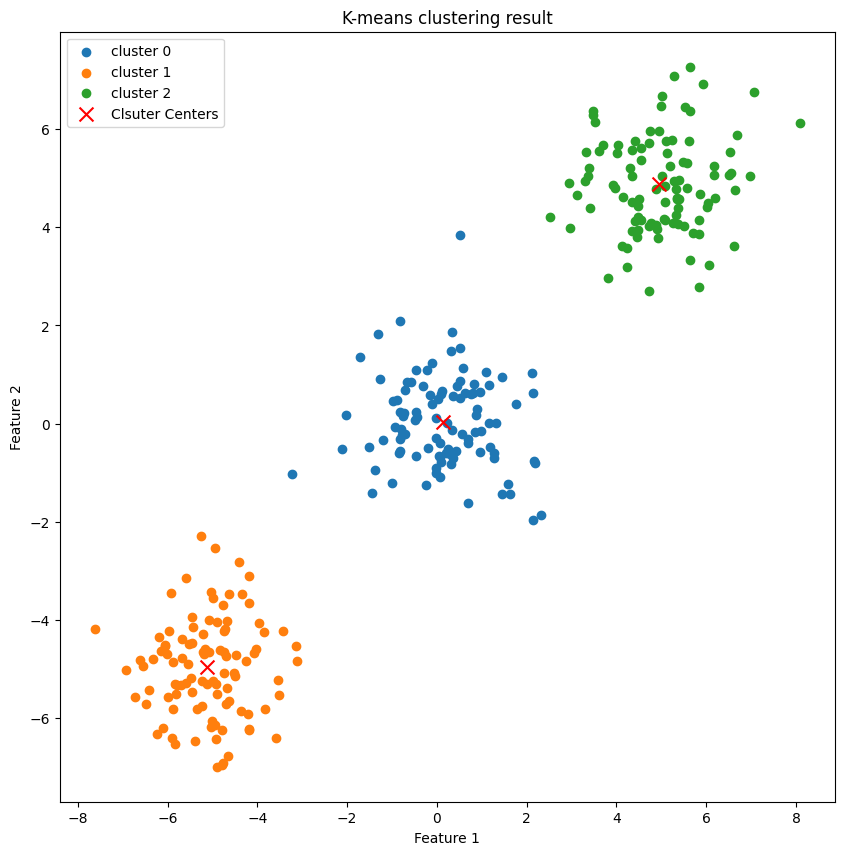

In [16]:
(y,Means) = kmeans(X,3,verbose=0)

plt.figure(figsize=(10,10))
for cluster in range(3):
    plt.scatter(X[y==cluster][:,0],X[y==cluster][:,1],label=f"cluster {cluster}")
plt.scatter(Means[:,0],Means[:,1],color="red",marker="x", s=100,label="Clsuter Centers")
plt.title("K-means clustering result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


<b>Part 6:</b>

Create different data sets with the function make_blobs shown above. Vary the number of samples and clusters. Investigate the behaviour of the K-Means algorithm for:

*   $k < p$
*   $k=p$
*   $k>p$

where p is the number of clusters.



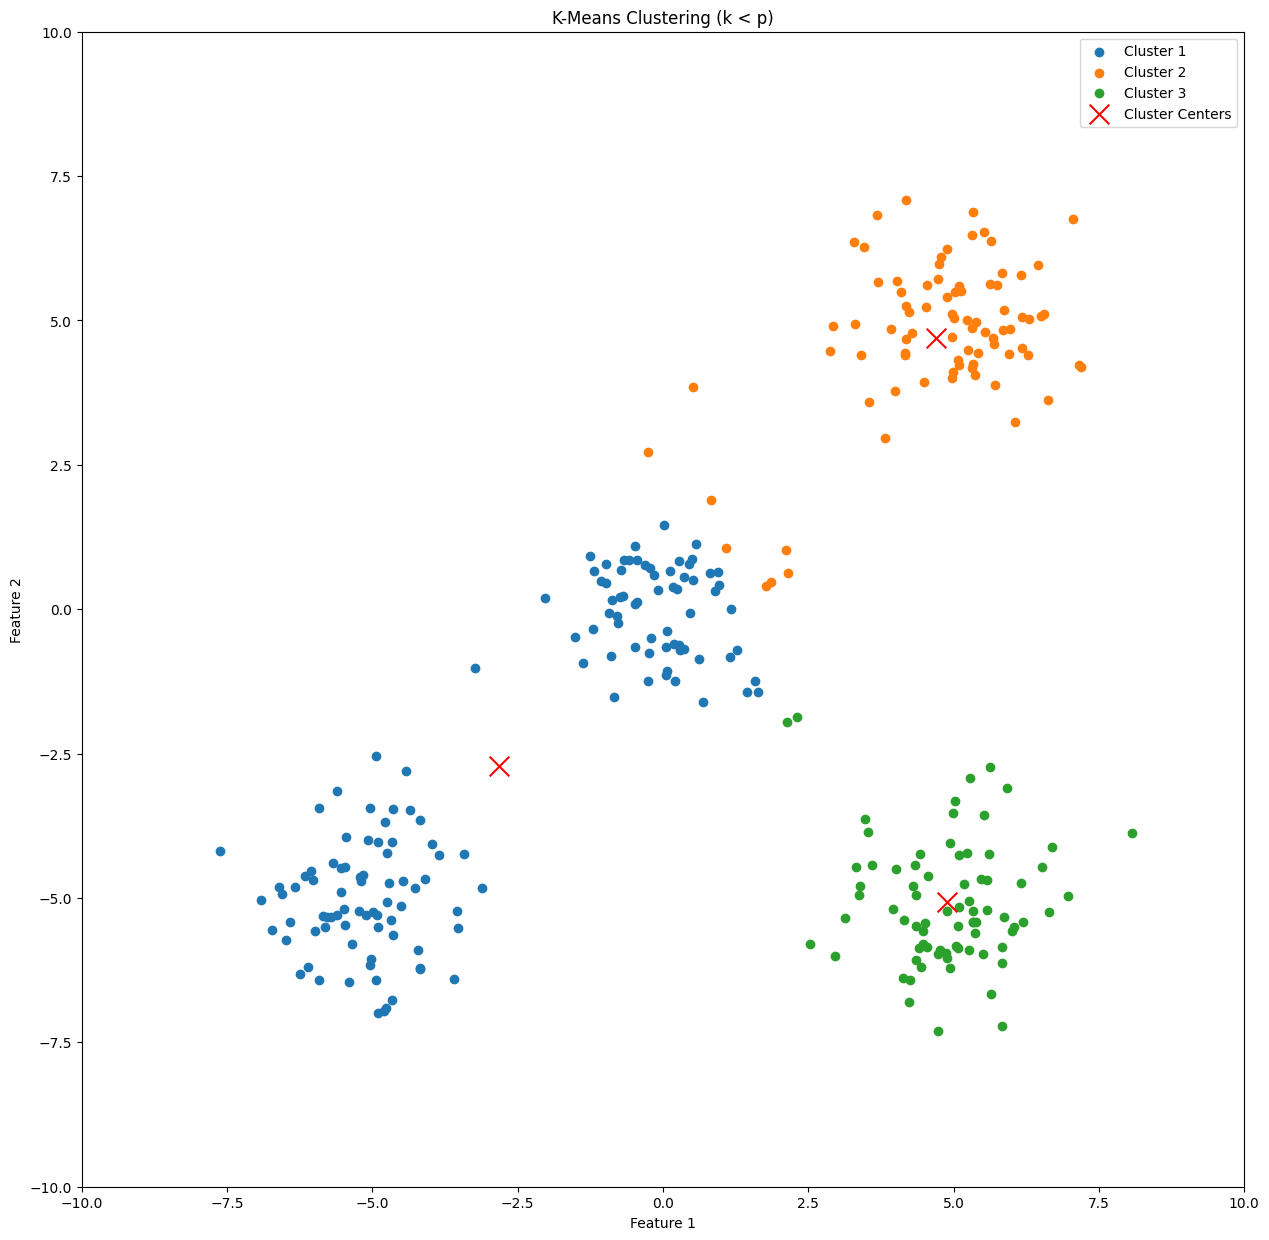

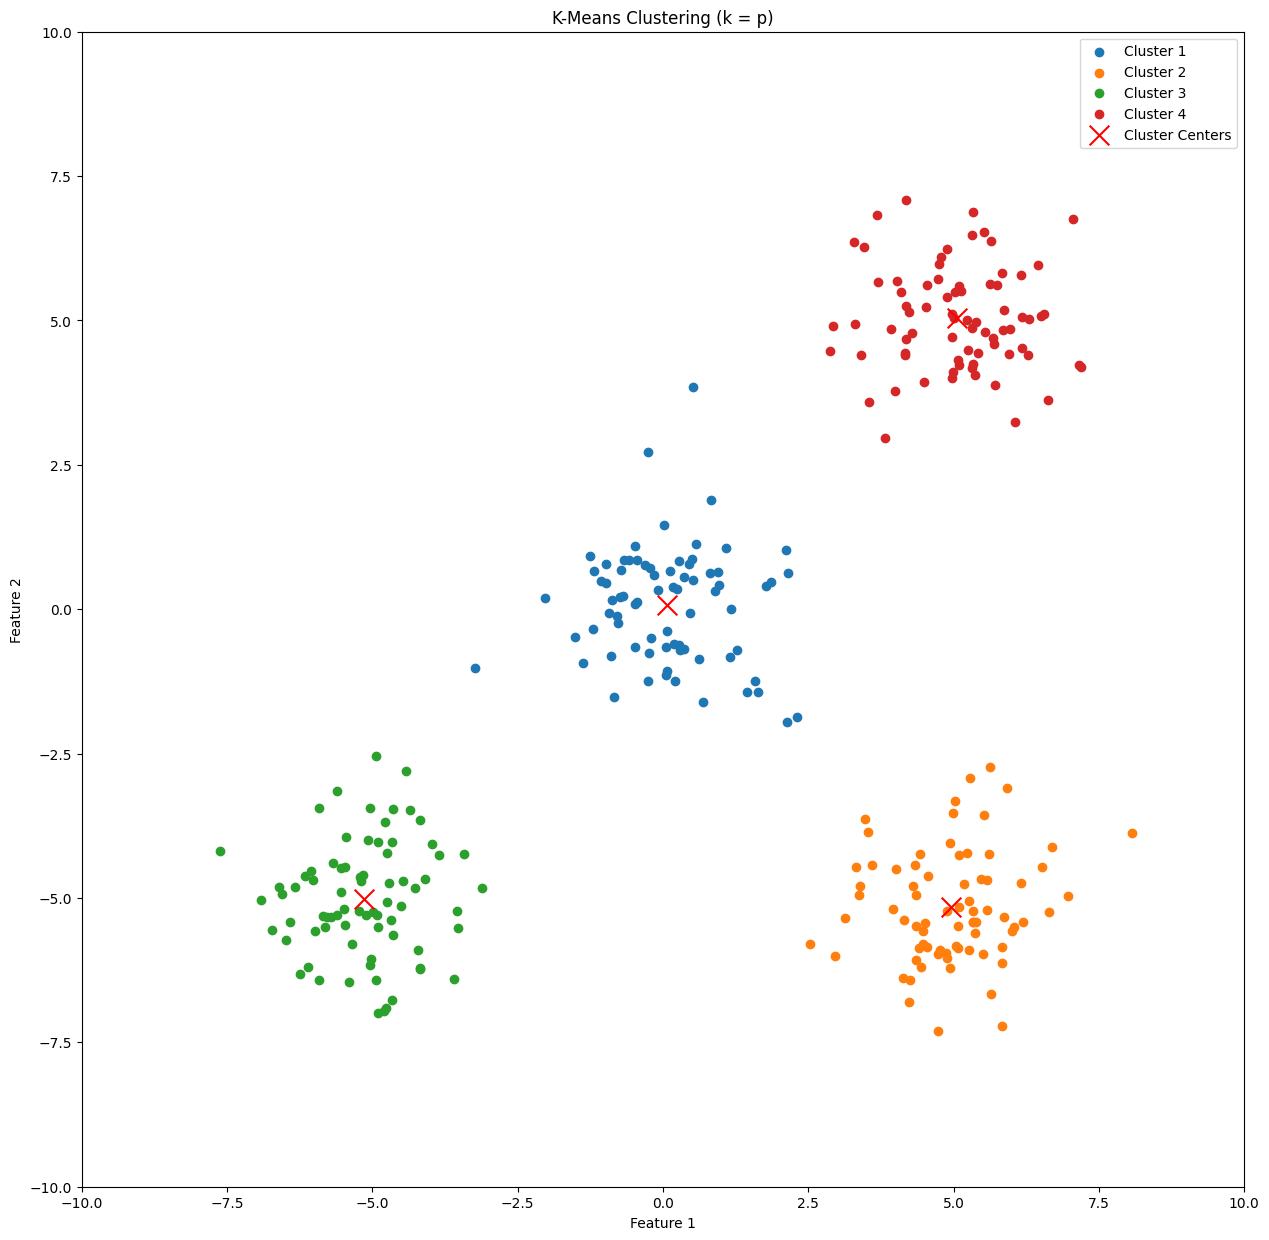

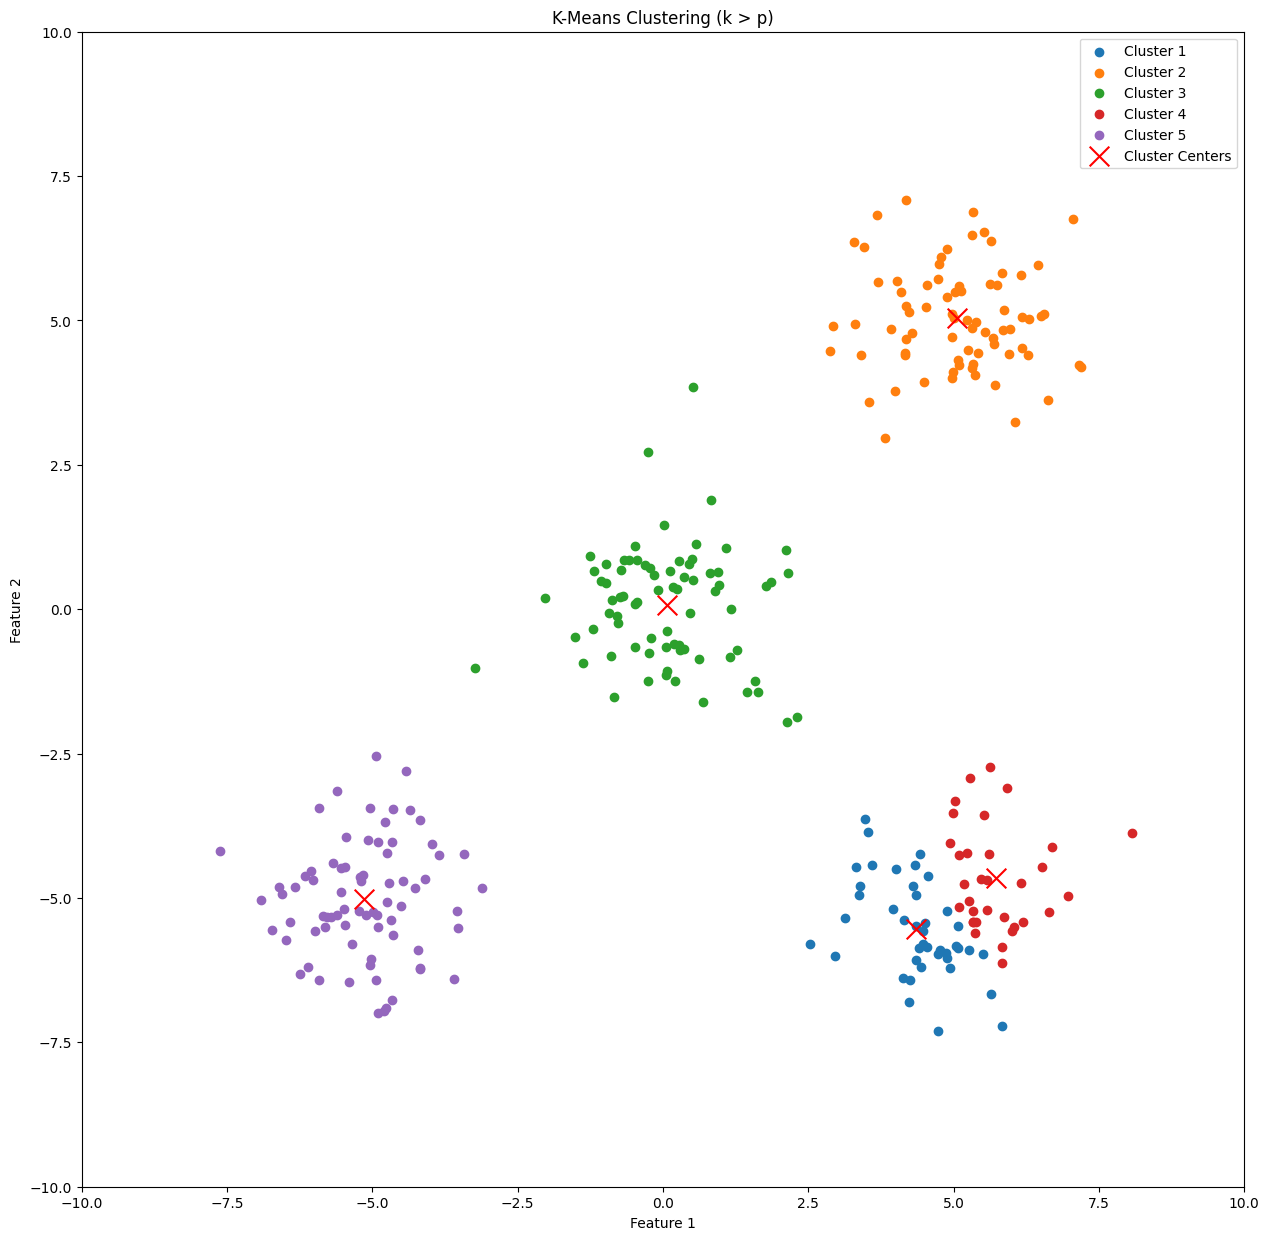

In [17]:
def investigate_cluster(samples=300,clusters=4):
    centers=[(-5,-5),(0,0),(5,5),(5,-5)]
    X, y_true = make_blobs(n_samples=samples, n_features=2, centers=centers[:clusters], random_state=42)

    scenarios = {"k < p": clusters - 1, "k = p": clusters, "k > p": clusters + 1}

    for scenario, k in scenarios.items():

        # Apply K-Means
        y_pred, Means = kmeans(X, k)

    
        # Plot results
        plt.figure(figsize=(15, 15))
        plt.xlim(-10, 10) 
        plt.ylim(-10, 10) 
        for cluster in range(k):
            plt.scatter(X[y_pred == cluster][:, 0], X[y_pred == cluster][:, 1], label=f"Cluster {cluster + 1}")
        plt.scatter(Means[:, 0], Means[:, 1], color='red', marker='x', s=200, label="Cluster Centers")
        plt.title(f"K-Means Clustering ({scenario})")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
       
        plt.legend()
        plt.show()

investigate_cluster(samples=300, clusters=4)
